This notebook prepares the raw Seattle and New York precipitation data for analysis. It converts datatypes, removes duplicates, handles missing values, and outputs a tidy dataset used in the analysis notebook

#### Data Source:
- Seattle, WA (SEA): Daily precipitation time series for the analysis period from 2018–2022.
- New York, NY (NYC): Daily precipitation time series for the same period.

##### Source provider:
- Seattle: https://github.com/brian-fischer/DATA-5100/blob/main/weather/seattle_rain.csv
- New York: https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00308721/detail

##### Units and conventions.
- Precipitation is measured in inches per day.
- Data collected from 1 station only

> Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

After this code, these libraries are successfully loaded and allow us to load, clean, analyze, and visualize data.

> Load Raw Data
Next, we load the NOAA daily precipitation dataset into to a DataFrame.

In [73]:
df_seattle = pd.read_csv('../data/seattle_rain.csv')

In [74]:
type(df_seattle)

pandas.core.frame.DataFrame

In [75]:
df_newyork = pd.read_csv('../data/newyork_rain.csv')

After the code, we have the data loaded into a DataFrame then we can inspect its structure

In [76]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [77]:
df_newyork.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USC00308721,"UPTON COOP NWSFO NEW YORK, NY US",2018-01-01,0.00,0.0,1.0
1,USC00308721,"UPTON COOP NWSFO NEW YORK, NY US",2018-01-02,0.00,0.0,1.0
2,USC00308721,"UPTON COOP NWSFO NEW YORK, NY US",2018-01-03,0.00,0.0,1.0
3,USC00308721,"UPTON COOP NWSFO NEW YORK, NY US",2018-01-04,0.17,1.5,2.0
4,USC00308721,"UPTON COOP NWSFO NEW YORK, NY US",2018-01-05,1.09,10.8,10.0


from the inspection, we can see that they don't have equivilent in columns and missing lot of data. Next, we can extract only the columns to see what columns in each dataset.

In [78]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [79]:
df_newyork.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

from the code above, we can clearly see how different in the columns of each dataset, then we check the missing values in each columns and their type of data.

In [80]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [81]:
df_newyork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1824 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB


In [82]:
print(df_seattle.shape)

(1658, 10)


In [83]:
print(df_newyork.shape)

(1826, 6)


In [84]:
df_seattle['STATION'].nunique()

1

In [85]:
df_newyork['STATION'].nunique()

1

From the dataset information that we got from above, we know that the data type of date column is object, so we may have problem with type of Date Time. For this problem, we need to change the data to the correct type of Date.

In [86]:
df_newyork['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, Length: 1826, dtype: object

In [87]:
df_seattle['DATE'].max()

'9/9/22'

In [88]:
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [89]:
df_newyork['DATE'].max()

'2022-12-31'

In [90]:
df_newyork['DATE'].tail()

1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, dtype: object

After checking the max date of Seattle using the max function, it return the value of '9/9/22' but the actual data from tail method is '12/31/22'. Therefore, the current data type of date is incorrect for Seattle's dataset. Next step is change the type and reassign the values back to the Date column.

In [91]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/hm/_316rgmd4v763bh_ttk3pzkr0000gn/T/ipykernel_58556/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [92]:
df_newyork['DATE'] = pd.to_datetime(df_newyork['DATE'])

In [93]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [94]:
df_newyork['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1821   2022-12-27
1822   2022-12-28
1823   2022-12-29
1824   2022-12-30
1825   2022-12-31
Name: DATE, Length: 1826, dtype: datetime64[ns]

In [95]:
df_seattle['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [96]:
df_seattle['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [97]:
df_newyork['DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [98]:
df_newyork['DATE'].max()

Timestamp('2022-12-31 00:00:00')

In [99]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [100]:
df_newyork['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

After fixing the data type of date column, these dataset now contain the correct type of date for next step that show the visualization for date and precipitation.

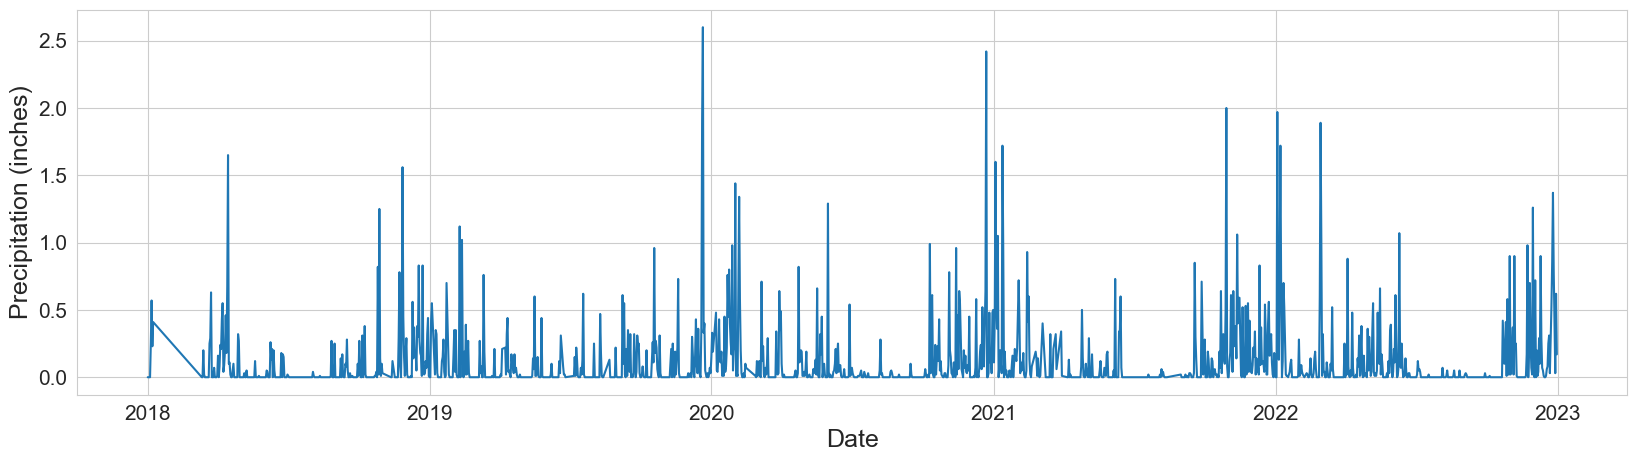

In [101]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

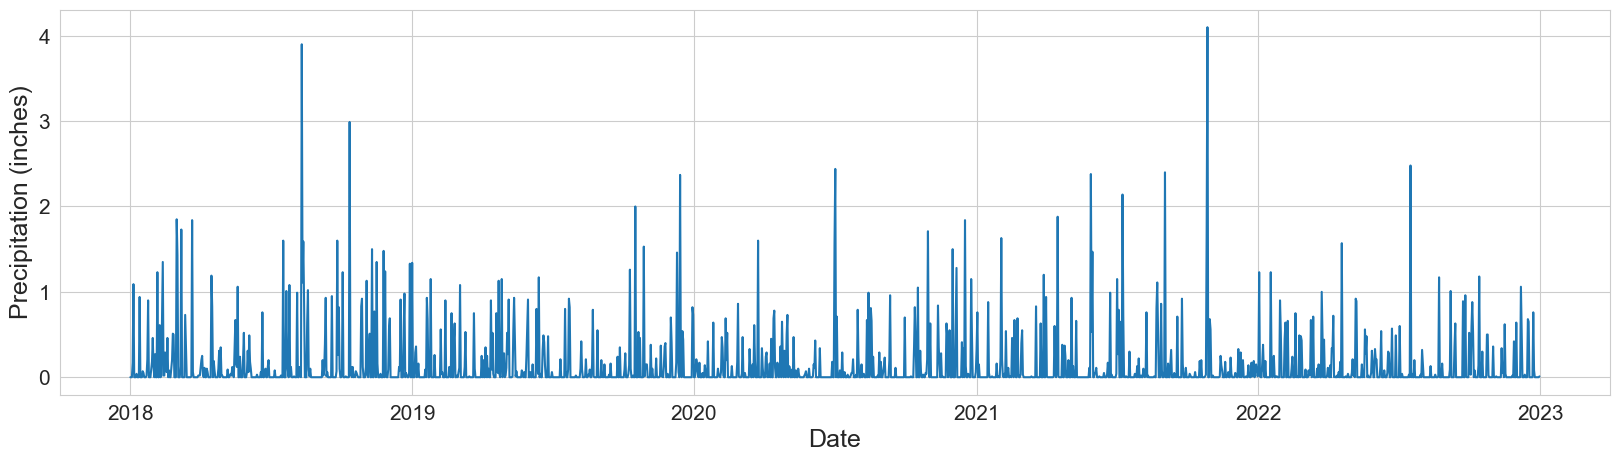

In [102]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_newyork, x='DATE', y = 'PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Next step is combine two dataset into a DataFrame for date and precipitation column based on date column using outer way,

In [103]:
df = df_newyork[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [104]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.17,0.00
4,2018-01-05,1.09,0.25


After merge two dataset, we have a date column and two precipitation columns from New York and Seattle. Next step is make the city column to be inseparate rows instead of separate columns.

In [105]:
df = df.melt(id_vars=['DATE'], var_name='city', value_name='precipitation')

In [106]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.17
4,2018-01-05,PRCP_x,1.09


After reformat the city column, we now have a DataFrame that contain date, city and precipitation columns. Next step is change the value of city column to be the name of city instead of PRCP_x and PRCP_y.

In [107]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'NYC'

In [108]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [109]:
df.head()

,DATE,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.17
4,2018-01-05,NYC,1.09


In [110]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Now we have clear city name for each row to be eaiser for analysis, but then we should also rename the DATE column to lower case to match with other columns.

In [111]:
df = df.rename(columns={'DATE': 'date'})

In [112]:
df.head()

,date,city,precipitation
0,2018-01-01,NYC,0.00
1,2018-01-02,NYC,0.00
2,2018-01-03,NYC,0.00
3,2018-01-04,NYC,0.17
4,2018-01-05,NYC,1.09


After setup the correct columns for new dataset, we get the information to insepect its structure.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3460 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [114]:
df.notna().sum()

date             3652
city             3652
precipitation    3460
dtype: int64

In [115]:
df.isna().sum()

date               0
city               0
precipitation    192
dtype: int64

from the code above, we know that the new dataset has 192 missing value, and next step is checking how many data is missing in each city.

In [116]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

In [117]:
df.loc[df['city'] == 'NYC', 'precipitation'].isna().sum()

np.int64(2)

from the code above, we can know how many values are missing in each cities. Now we need to find a way to replace the missing value with a new value for next step. We then decide to replace the value based on the mean value of the specific day, so next step is assign a specific day of year to each row.

In [118]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [119]:
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.17,4
4,2018-01-05,NYC,1.09,5
5,2018-01-06,NYC,0.00,6
6,2018-01-07,NYC,0.00,7
7,2018-01-08,NYC,0.00,8
8,2018-01-09,NYC,0.04,9
9,2018-01-10,NYC,0.00,10


Now each rows contain its day of year, then we will compute the mean for each day of the year for each cities and show the visualization of the result.

In [120]:
mean_day_precipitation_sea = df.loc[
  df['city'] == 'SEA',
  ['precipitation', 'day_of_year']
].groupby('day_of_year').mean()
mean_day_precipitation_sea

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


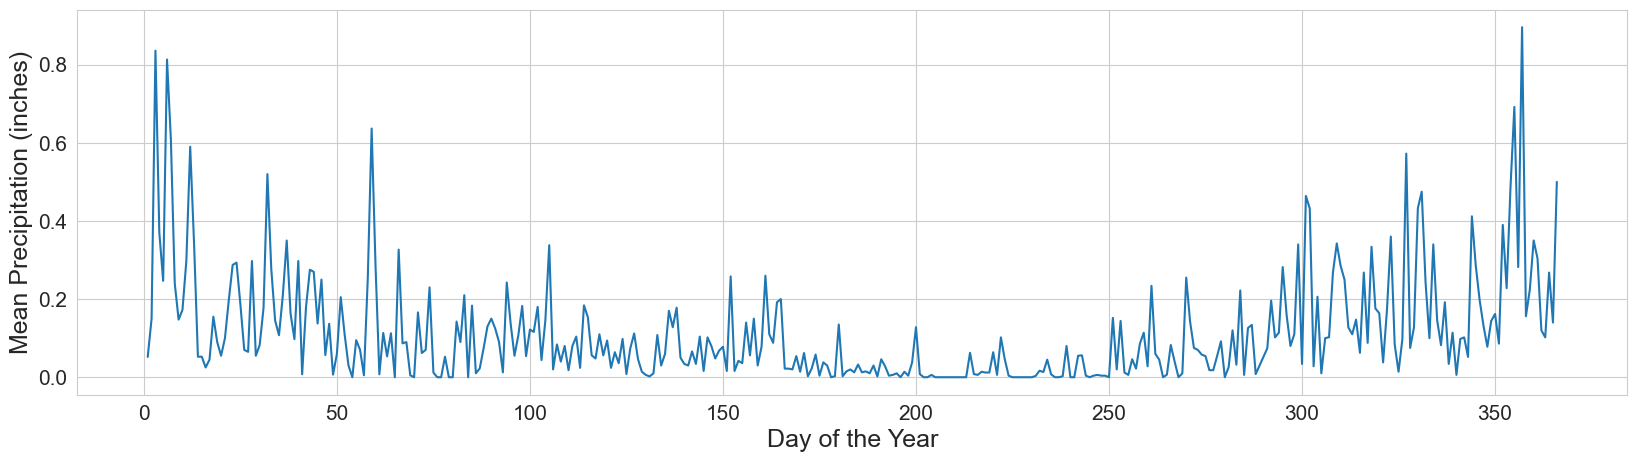

In [121]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_sea, x='day_of_year', y='precipitation')

plt.xlabel('Day of the Year', fontsize=18)
plt.ylabel('Mean Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [122]:
mean_day_precipitation_nyc = df.loc[
  df['city'] == 'NYC',
  ['precipitation', 'day_of_year']
].groupby('day_of_year').mean()
mean_day_precipitation_nyc

,precipitation
day_of_year,
1,0.346
2,0.398
3,0.018
4,0.106
5,0.306
...,...
362,0.032
363,0.296
364,0.178


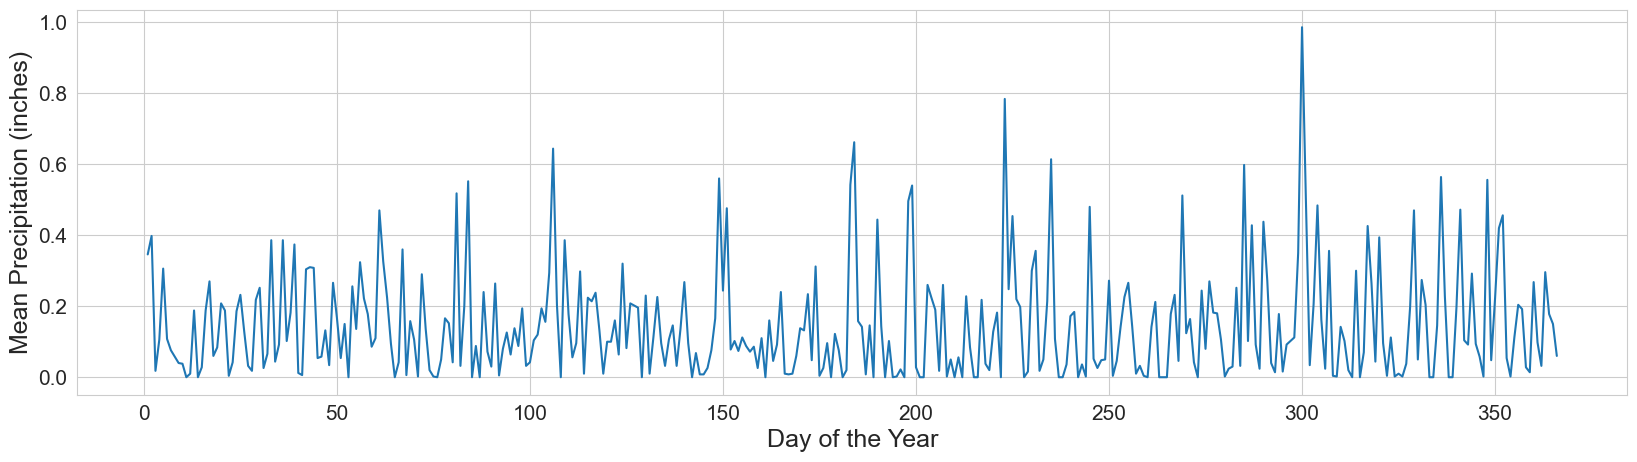

In [123]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_nyc, x='day_of_year', y='precipitation')

plt.xlabel('Day of the Year', fontsize=18)
plt.ylabel('Mean Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Now we can visualize the mean value for each day of year of Seattle. Next, we need to get the index of all rows that missing value of prepicipation.

In [124]:
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.17,4
4,2018-01-05,NYC,1.09,5


In [125]:
df['precipitation'].isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3647    False
3648    False
3649    False
3650    False
3651    False
Name: precipitation, Length: 3652, dtype: bool

In [126]:
indices = np.where(df['precipitation'].isna() == True)[0]

In [127]:
indices

array([  91,  425, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842,
       1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875,
       1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131,
       2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196,
       2197, 2214, 2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287,
       2288, 2362, 2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375,
       2376, 2377, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518,
       2519, 2520, 2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603,
       2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819,
       2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974,
       2975, 2983, 2984, 2986, 2987, 2988, 3000, 30

In [128]:
for index in indices:
  if df.loc[index, 'city'] == 'SEA':
    df.loc[index, 'precipitation'] = mean_day_precipitation_sea.loc[df.loc[index, 'day_of_year']].values[0]
  else:
    df.loc[index, 'precipitation'] = mean_day_precipitation_nyc.loc[df.loc[index, 'day_of_year']].values[0]

Now the DataFrame should not contain any missing value and we can check it again using the sum of isna method.

In [129]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

After ensure the dataset now contain no missing value and ready for analysis, we can export the cleaned dataset to a new csv file and ready for next step.

In [130]:
df.to_csv('../data/clean_seattle_newyork_weather.csv', encoding='utf-8-sig', index=False)

The cleaned dataset is saved in ../data/clean_seattle_newyork_weather.csv